Enter a string:  AAPL


C:\Users\admin\Documents\IT1224\stockPredictionProject\AAPL.csv
[-6.59277283e-01  8.83683212e-01  7.74470414e-01 -1.63686519e-10]
0.041749118317333966
[ 23.67559773  43.50802828  31.70594085  28.17459041 173.26254805
  26.60481131  24.94282067  88.0590164   46.50972645  44.87657283
  18.92936624  29.6703869   16.0993497   24.57946998  31.80644922
  18.77559307  67.5620328   32.02698243  65.87348146  38.69621207
  34.87912213  72.76479897 132.88046608  47.57254236  28.02697287
  23.70744748  18.85480802  28.53695645  38.85480893  33.35887207
  28.88322566 169.49250592  16.04559333 148.31191763  38.13216658
  30.21340664  23.85312237  43.69045805  29.56999186  38.72923133
  21.24467448  23.89506666 150.60701874  46.7690134   54.791919
 142.89036824  38.7036383   17.82182457  26.84028997  50.38994342
 132.40209569  51.37163432  43.41705094 164.54661698 152.52513524
  32.97515961  26.99127064 129.23051373  65.39630159  28.63828877
 140.01652698  38.70959206 174.11462787  28.68827117  17.26

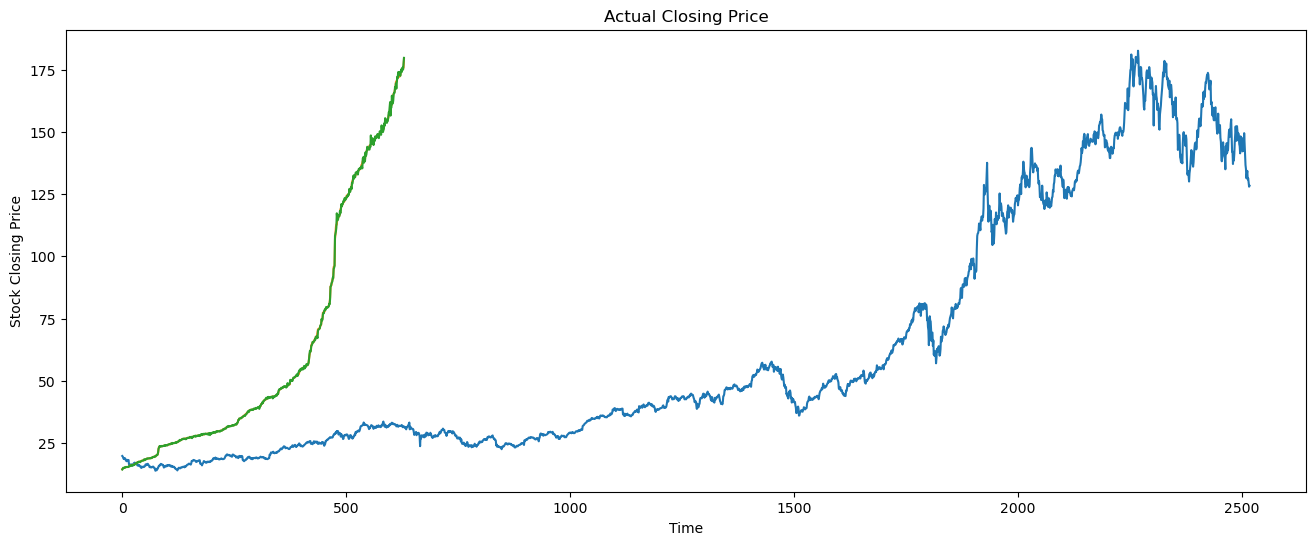

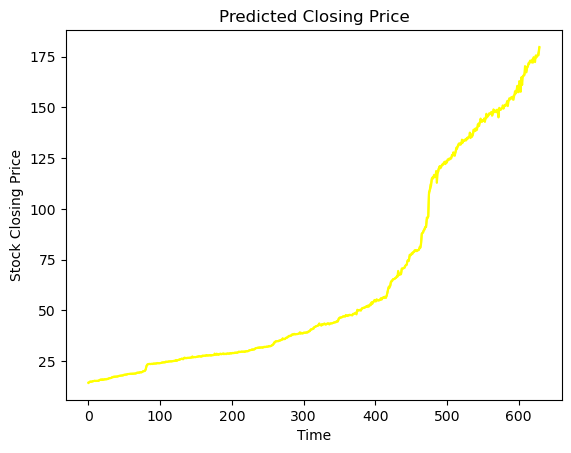

0.9998567119971645

In [9]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt



company = input("Enter a string: ")
path = "C:\\Users\\admin\\Documents\\IT1224\\stockPredictionProject\\"+company+".csv"
print (path)


# In[3]:


df = pd.read_csv(path)
df.head()


# In[4]:


df.dtypes
df['Date']=pd.to_datetime(df.Date)
df.shape


# In[5]:


df.drop('Adj Close',axis=1,inplace=True)
df['Volume']=df['Volume'].astype(float)
df.dtypes

df.isnull().sum()
df.isna().any()

df_new = df[np.isfinite(df).all(1)]

df_new['Open'].plot(figsize=(16,6))

x=df_new[['Open','High','Low','Volume']]
y=df_new['Close']   


# In[6]:


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)


# In[36]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import  confusion_matrix,accuracy_score
regressor=LinearRegression()


# In[37]:


regressor.fit(x_train,y_train)

print(regressor.coef_)

print(regressor.intercept_)


# In[38]:


predicted=regressor.predict(x_test)
print(predicted)


# In[39]:


#dframe=pd.DataFrame(y_test,predicted)
#dframe.shape
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})


# In[40]:


print(dfr)


# In[41]:


dfr.sort_values("Actual",ascending=False)
dfr.sort_values("Predicted",ascending=False)


# In[42]:


lst=[i for i in range(0,len(dfr.Actual))]
ak=dfr.head(len(dfr.Actual))
aka=ak.sort_values("Actual")

#print(ak)
plt.plot(lst,aka)
plt.xlabel("Time")
plt.ylabel("Stock Closing Price")
plt.title("Actual Closing Price")
#plt.plot(lst,aak,color="Blue")
#df_new['Close'].plot(figsize=(16,6))
plt.show()


# In[43]:


lst=[i for i in range(0,len(dfr.Actual))]
aak=ak.sort_values("Predicted")
plt.plot(lst,aak,color="Yellow")
plt.xlabel("Time")
plt.ylabel("Stock Closing Price")
plt.title("Predicted Closing Price")
plt.show()


# In[44]:


regressor.score(x_test,y_test)


# In[ ]:




